In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
import fingerprinting
from collections import defaultdict
from scipy.ndimage.filters import maximum_filter
import mysql.connector
import os
import os.path
import pydub

%matplotlib inline

In [92]:
freq, rec = wavfile.read('data/recordings/')

/Users/dtochilkin/work/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [93]:
recording = rec[:,0]

In [89]:
recording = np.sum(np.asarray(rec), axis=1)  #song[1000000:2000000]

In [51]:
Audio(recording[:], rate = freq)

In [100]:
name, max_bin, time_bins = recognize(recording, cursor)

/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)


In [8]:
cnx = mysql.connector.connect(user='root', password='webster',
                              host='127.0.0.1',
                              database='fprints')

In [9]:
cursor = cnx.cursor()

In [10]:
add_fprint = ("INSERT IGNORE INTO fingerprints "
             "(hash, offset, song_id) VALUES (%s, %s, %s)")
add_song = ("INSERT INTO songnames "
           "(songname) VALUES (%s);")

In [11]:
select_fprint = ("SELECT offset, song_id FROM fingerprints WHERE hash = %s;")

In [12]:
select_song = ("SELECT songname FROM songnames WHERE song_id = %s")

In [13]:
select = ("SELECT fingerprints.offset, songnames.songname FROM "
          "fingerprints INNER JOIN songnames ON fingerprints.song_id = songnames.song_id "
          "WHERE fingerprints.hash = %s;")

In [37]:
cursor.execute(select, ('43573db1b1',))

In [107]:
for k, v in time_bins.items():
    b[k + 2320] = v

## Pipeline that recursively opens every .mp3 file in data/ directory, proprocesses and fingerprints it, and then puts it into the MySQL database

In [ ]:
for dirpath, dirnames, filenames in os.walk("data/"):
    for filename in [f for f in filenames if f.endswith(".mp3")]:
        full_path = os.path.join(dirpath, filename)
        sound = pydub.AudioSegment.from_mp3(full_path)
        sound = sound.set_channels(1)
        full_path_wav = full_path.replace('mp3', 'wav')
        sound.export(full_path_wav, format="wav")
        samp_freq, song = wavfile.read(full_path_wav)
        if samp_freq != 44100 or isinstance(song[0], list):
            continue
        try:
            hashes=fingerprinting.gen_fingerprint(song)
            cursor.execute(add_song, (filename[:-4],))
            song_id = cursor.lastrowid
            for h in hashes:
                cursor.execute(add_fprint, (h[0], int(h[1]), song_id,))
        except:
            print(full_path)
            break
        cnx.commit()
        os.remove(full_path)
#     break

/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in

data/David Bowie - DiscoGraphy (1966-2016) MP3 [320 kbps]-TX/Albums/2004.Black Tie White Noise/2004.Black Tie White Noise [Disc 2]/05.Miracle Goodnight [Make Believe Mix].mp3


/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in

data/David Bowie - DiscoGraphy (1966-2016) MP3 [320 kbps]-TX/Albums/2004.Black Tie White Noise/2004.Black Tie White Noise [Disc 1]/02.You've Been Around.mp3


/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)
/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)


data/David Bowie - DiscoGraphy (1966-2016) MP3 [320 kbps]-TX/Albums/1984.Tonight/06. David Bowie - Blue Jean.mp3


/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)


In [29]:
cursor.close()
cnx.close()

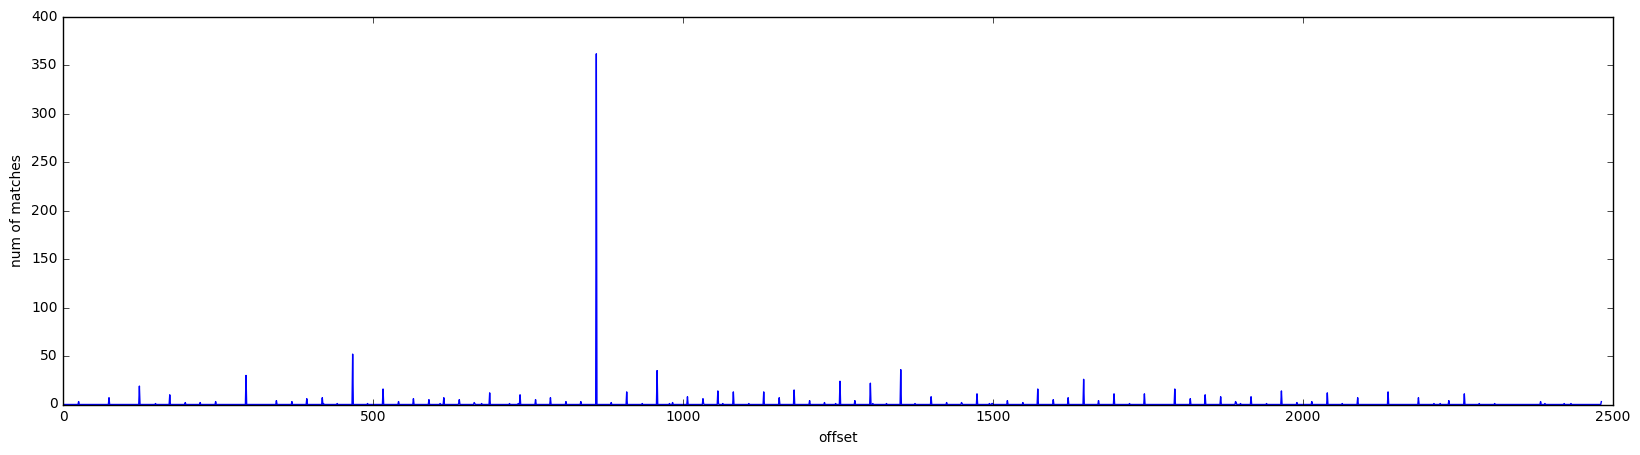

In [113]:
plt.figure(figsize=(20,5))
plt.plot(b);
plt.xlabel("offset")
plt.ylabel("num of matches");

In [16]:
frequency_idx, time_idx = fingerprinting.get_2D_peaks(arr2D, True)

In [95]:
lengths = np.linspace(10000, len(recording), 30)
bins = []
for l in lengths:
    songname, max_bin = recognize(recording[:int(l)], cursor)
    
    print(songname)
    bins.append(max_bin)

[]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]


/Users/dtochilkin/Documents/Skoltech/image_processing/final_project/fingerprinting.py:27: RuntimeWarning: divide by zero encountered in log10
  arr2D = 10 * np.log10(arr2D)


[('05. Дос-ви-дос',)]
[('05. Дос-ви-дос',)]


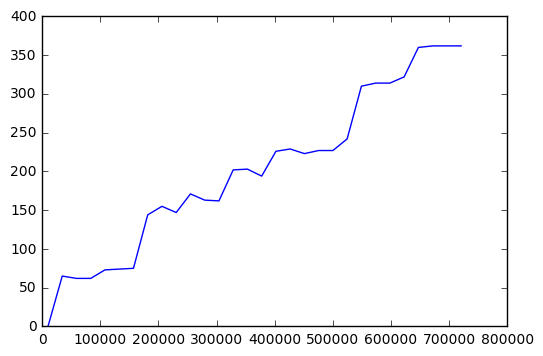

In [117]:
plt.plot(lengths, bins);

In [80]:
recognize(recording[:500000], cursor)

(('06. Ocean Of Noise',), 123)

In [83]:
recognize(recording[:200000], cursor)

(('06. Ocean Of Noise',), 43)